# Description

**SOURCE :** https://www.equinor.com/en/news/14jun2018-disclosing-volve-data.html

**Target Variable (Dependent Variable)** : AVG_DOWNHOLE_PRESSURE

**Features** : AVG_ANNULUS_PRESS ; AVG_CHOKE_SIZE_P ; AVG_WHP_P  (Well head pressure) ; AVG_WHT_P  (Well head pressure); DP_CHOKE_SIZE (difference in pressure) & Oil, Gas and Water Volume output from the well

# Libraries

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns

# Dataset

In [43]:
data = pd.read_csv("../Data/Volve dataset.csv")

## Data Exploration 

In [44]:
data.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.38,...,%,33.1,10.48,33.07,0.0,0.0,0.0,NaN,production,OP


In [45]:
data.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994172,181.803906,77.162982,154.028821,14.856087,55.168560,45.377821,67.728389,11.441017,1095.631548,161049.059703,1672.151332,5315.480818
std,649.231622,0.0,0.0,8.369911,109.712397,45.657959,76.752465,8.406778,36.693002,24.752653,27.719028,19.816905,1323.538151,188136.410434,1706.982853,2181.486660
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665000,10.842500,18.955000,31.150000,56.580000,0.000000,190.690000,29430.590000,19.870000,4338.207500
50%,5693.000000,3420717.0,369304.0,24.000000,232.895000,103.185000,175.585000,16.310000,52.100000,37.930000,80.070000,2.385000,557.550000,87749.660000,1097.790000,5504.740000
75%,5769.000000,3420717.0,369304.0,24.000000,255.402500,106.280000,204.317500,21.307500,99.920000,57.105000,88.060000,13.762500,1345.200000,202482.300000,3260.950000,6781.057500
max,7405.000000,3420717.0,369304.0,25.000000,397.590000,108.500000,345.910000,30.020000,100.000000,137.310000,93.510000,125.720000,5901.840000,851131.520000,8019.740000,10013.600000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   NPD_WELL_BORE_CODE        15634 non-null  int64  
 3   NPD_WELL_BORE_NAME        15634 non-null  object 
 4   NPD_FIELD_CODE            15634 non-null  int64  
 5   NPD_FIELD_NAME            15634 non-null  object 
 6   NPD_FACILITY_CODE         15634 non-null  int64  
 7   NPD_FACILITY_NAME         15634 non-null  object 
 8   ON_STREAM_HRS             15349 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

<AxesSubplot:>

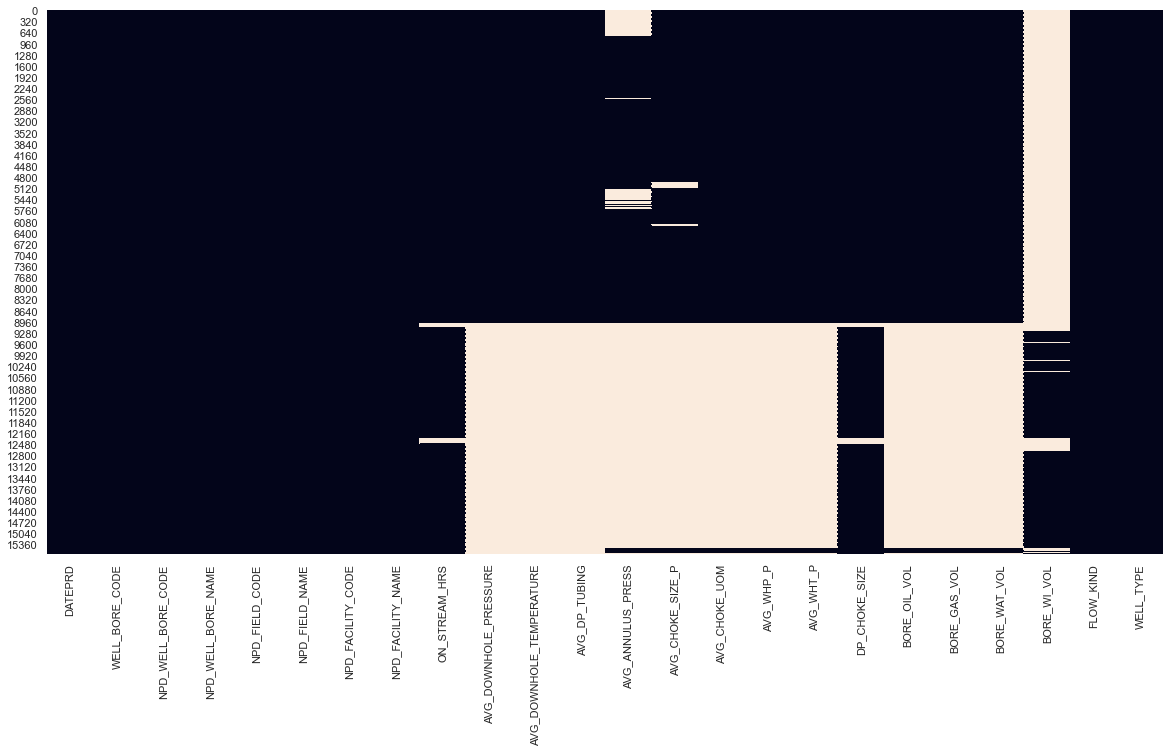

In [47]:
plt.figure(figsize = (20,10))
sns.heatmap(data.isna(), cbar = False)

**--> There are a lot of Nan values**

## Data Cleaning 

In [48]:
# Filtering out values of target variable that has zero values
data = data[(data['AVG_DOWNHOLE_PRESSURE'] !=0)]

In [49]:
#Selecting rows only during the production state and dropping off shutdown period values
data =data.drop(data[(data['BORE_OIL_VOL'] == 0) & (data['BORE_GAS_VOL'] == 0.0) & (data['BORE_WAT_VOL'] == 0)].index)

In [50]:
# Dropping all nan values 
data=data.dropna(subset =["AVG_DOWNHOLE_PRESSURE"])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   NPD_WELL_BORE_CODE        5943 non-null   int64  
 3   NPD_WELL_BORE_NAME        5943 non-null   object 
 4   NPD_FIELD_CODE            5943 non-null   int64  
 5   NPD_FIELD_NAME            5943 non-null   object 
 6   NPD_FACILITY_CODE         5943 non-null   int64  
 7   NPD_FACILITY_NAME         5943 non-null   object 
 8   ON_STREAM_HRS             5943 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 11  AVG_DP_TUBING             5943 non-null   float64
 12  AVG_ANNULUS_PRESS         5021 non-null   float64
 13  AVG_CHOKE_SIZE_P          5943 non-null   float64
 14  AVG_CHO

## Dropping columns

In [52]:
data.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [53]:
data.dtypes
data.dtypes.value_counts()

float64    13
object      8
int64       3
dtype: int64

<AxesSubplot:ylabel='None'>

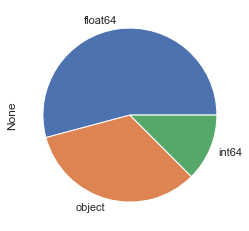

In [54]:
data.dtypes.value_counts().plot.pie()

In [55]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

DATEPRD------------------------------------------- ['22-Apr-14' '23-Apr-14' '24-Apr-14' ... '17-Apr-16' '21-Apr-16'
 '22-Apr-16']
WELL_BORE_CODE------------------------------------ ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D']
NPD_WELL_BORE_NAME-------------------------------- ['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D']
NPD_FIELD_NAME------------------------------------ ['VOLVE']
NPD_FACILITY_NAME--------------------------------- ['MÆRSK INSPIRER']
AVG_CHOKE_UOM------------------------------------- ['%']
FLOW_KIND----------------------------------------- ['production']
WELL_TYPE----------------------------------------- ['OP' 'WI']


#### --> Drop : 
(Codes, Names, Hrs)

    NPD_WELL_BORE_CODE        5940 non-null   object
    
    NPD_WELL_BORE_NAME          5943 non-null object
 
    NPD_FIELD_NAME            5940 non-null   object
    
    NPD_FIELD_CODE              5943 non-null int64
 
    NPD_FACILITY_NAME         5940 non-null   object
    
    AVG_CHOKE_UOM             5940 non-null   object
    
    FLOW_KIND                 5940 non-null   object 
 
    ON_STREAM_HRS             5940 non-null   float64


In [64]:
df=data.drop(data.columns[2:9], axis =1)
df

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
15,22-Apr-14,NO 15/9-F-1 C,289.42,106.35,182.06,0.00,43.34,%,107.36,37.94,78.94,631.47,90439.09,0.00,NaN,production,OP
16,23-Apr-14,NO 15/9-F-1 C,270.24,107.64,171.05,NaN,47.17,%,99.19,60.76,70.63,1166.46,165720.39,0.00,NaN,production,OP
17,24-Apr-14,NO 15/9-F-1 C,262.84,107.87,168.24,NaN,47.73,%,94.60,63.05,66.05,1549.81,221707.31,0.00,NaN,production,OP
18,25-Apr-14,NO 15/9-F-1 C,255.53,107.97,165.54,NaN,48.53,%,89.99,64.55,61.41,1248.70,178063.52,0.00,NaN,production,OP
19,26-Apr-14,NO 15/9-F-1 C,247.20,108.05,162.42,NaN,49.84,%,84.78,65.72,56.15,1345.78,192602.19,0.00,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,02-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.17,21.32,31.58,%,15.81,49.02,1.26,144.01,23201.35,203.93,NaN,production,OP
8924,03-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.20,21.11,31.54,%,15.77,48.99,1.20,145.22,23068.07,202.93,NaN,production,OP
8925,04-Jul-16,NO 15/9-F-15 D,194.32,106.52,178.62,21.35,31.52,%,15.70,50.10,1.28,142.74,23059.68,203.84,NaN,production,OP
8926,05-Jul-16,NO 15/9-F-15 D,195.21,106.51,179.60,20.63,31.52,%,15.61,49.84,1.20,144.46,23090.47,202.76,NaN,production,OP


In [65]:
#AVG_ANNULUS_PRESS : Not measured at the surface
df = df.drop(df.columns[5], axis =1)
df

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
15,22-Apr-14,NO 15/9-F-1 C,289.42,106.35,182.06,43.34,%,107.36,37.94,78.94,631.47,90439.09,0.00,NaN,production,OP
16,23-Apr-14,NO 15/9-F-1 C,270.24,107.64,171.05,47.17,%,99.19,60.76,70.63,1166.46,165720.39,0.00,NaN,production,OP
17,24-Apr-14,NO 15/9-F-1 C,262.84,107.87,168.24,47.73,%,94.60,63.05,66.05,1549.81,221707.31,0.00,NaN,production,OP
18,25-Apr-14,NO 15/9-F-1 C,255.53,107.97,165.54,48.53,%,89.99,64.55,61.41,1248.70,178063.52,0.00,NaN,production,OP
19,26-Apr-14,NO 15/9-F-1 C,247.20,108.05,162.42,49.84,%,84.78,65.72,56.15,1345.78,192602.19,0.00,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,02-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.17,31.58,%,15.81,49.02,1.26,144.01,23201.35,203.93,NaN,production,OP
8924,03-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.20,31.54,%,15.77,48.99,1.20,145.22,23068.07,202.93,NaN,production,OP
8925,04-Jul-16,NO 15/9-F-15 D,194.32,106.52,178.62,31.52,%,15.70,50.10,1.28,142.74,23059.68,203.84,NaN,production,OP
8926,05-Jul-16,NO 15/9-F-15 D,195.21,106.51,179.60,31.52,%,15.61,49.84,1.20,144.46,23090.47,202.76,NaN,production,OP


In [66]:
#AVG_CHOKE_UOM (Symbol)
df = df.drop(df.columns[6], axis =1)
df

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
15,22-Apr-14,NO 15/9-F-1 C,289.42,106.35,182.06,43.34,107.36,37.94,78.94,631.47,90439.09,0.00,NaN,production,OP
16,23-Apr-14,NO 15/9-F-1 C,270.24,107.64,171.05,47.17,99.19,60.76,70.63,1166.46,165720.39,0.00,NaN,production,OP
17,24-Apr-14,NO 15/9-F-1 C,262.84,107.87,168.24,47.73,94.60,63.05,66.05,1549.81,221707.31,0.00,NaN,production,OP
18,25-Apr-14,NO 15/9-F-1 C,255.53,107.97,165.54,48.53,89.99,64.55,61.41,1248.70,178063.52,0.00,NaN,production,OP
19,26-Apr-14,NO 15/9-F-1 C,247.20,108.05,162.42,49.84,84.78,65.72,56.15,1345.78,192602.19,0.00,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,02-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.17,31.58,15.81,49.02,1.26,144.01,23201.35,203.93,NaN,production,OP
8924,03-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.20,31.54,15.77,48.99,1.20,145.22,23068.07,202.93,NaN,production,OP
8925,04-Jul-16,NO 15/9-F-15 D,194.32,106.52,178.62,31.52,15.70,50.10,1.28,142.74,23059.68,203.84,NaN,production,OP
8926,05-Jul-16,NO 15/9-F-15 D,195.21,106.51,179.60,31.52,15.61,49.84,1.20,144.46,23090.47,202.76,NaN,production,OP


In [67]:
df["WELL_TYPE"].value_counts()

OP    5942
WI       1
Name: WELL_TYPE, dtype: int64

In [68]:
#only consider OP wells
df=df.loc[df["WELL_TYPE"]=='OP']

In [69]:
#WI_VOL (NO DATA) & Flow_Kind & Well_Type 
df=df.iloc[:,:12]
df

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
15,22-Apr-14,NO 15/9-F-1 C,289.42,106.35,182.06,43.34,107.36,37.94,78.94,631.47,90439.09,0.00
16,23-Apr-14,NO 15/9-F-1 C,270.24,107.64,171.05,47.17,99.19,60.76,70.63,1166.46,165720.39,0.00
17,24-Apr-14,NO 15/9-F-1 C,262.84,107.87,168.24,47.73,94.60,63.05,66.05,1549.81,221707.31,0.00
18,25-Apr-14,NO 15/9-F-1 C,255.53,107.97,165.54,48.53,89.99,64.55,61.41,1248.70,178063.52,0.00
19,26-Apr-14,NO 15/9-F-1 C,247.20,108.05,162.42,49.84,84.78,65.72,56.15,1345.78,192602.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,02-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.17,31.58,15.81,49.02,1.26,144.01,23201.35,203.93
8924,03-Jul-16,NO 15/9-F-15 D,194.98,106.52,179.20,31.54,15.77,48.99,1.20,145.22,23068.07,202.93
8925,04-Jul-16,NO 15/9-F-15 D,194.32,106.52,178.62,31.52,15.70,50.10,1.28,142.74,23059.68,203.84
8926,05-Jul-16,NO 15/9-F-15 D,195.21,106.51,179.60,31.52,15.61,49.84,1.20,144.46,23090.47,202.76


In [70]:
#AVG_DP_Tubing : Pressure difference between top and bottom of well
df=df.drop(df.columns[4], axis =1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 15 to 8927
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5942 non-null   object 
 1   WELL_BORE_CODE            5942 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5942 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5942 non-null   float64
 4   AVG_CHOKE_SIZE_P          5942 non-null   float64
 5   AVG_WHP_P                 5942 non-null   float64
 6   AVG_WHT_P                 5942 non-null   float64
 7   DP_CHOKE_SIZE             5942 non-null   float64
 8   BORE_OIL_VOL              5942 non-null   float64
 9   BORE_GAS_VOL              5942 non-null   float64
 10  BORE_WAT_VOL              5942 non-null   float64
dtypes: float64(9), object(2)
memory usage: 557.1+ KB


In [72]:
# Each well data
df["WELL_BORE_CODE"].value_counts()

NO 15/9-F-14 H    2703
NO 15/9-F-11 H    1118
NO 15/9-F-12 H     925
NO 15/9-F-15 D     767
NO 15/9-F-1 C      429
Name: WELL_BORE_CODE, dtype: int64

In [74]:
df.to_csv('../Data/Cleaned_Data.csv')

In [75]:
import sys
sys.path.append('../Functions/')

In [76]:
import EDA_Func

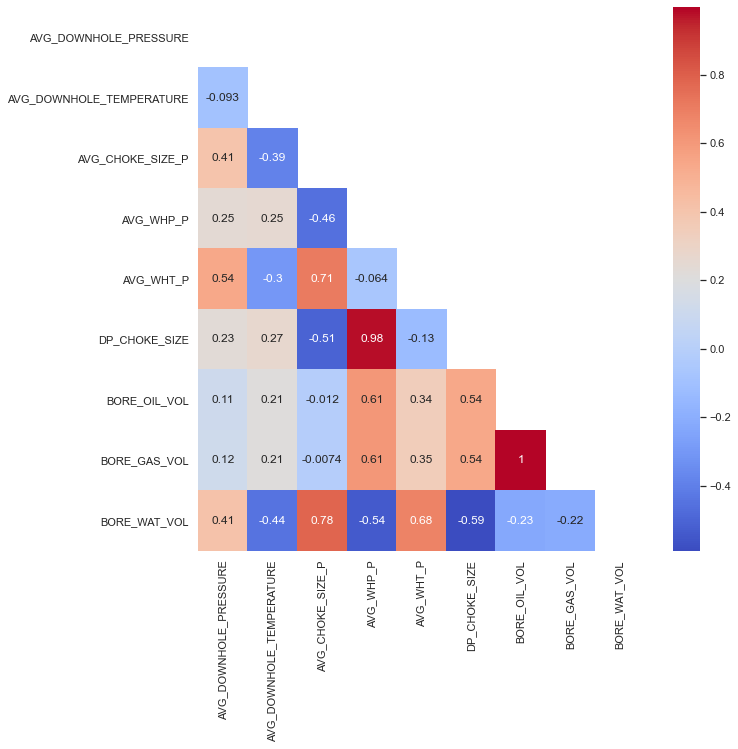

In [77]:
EDA_Func.half_corr_heatmap(df, title=None, file=None)

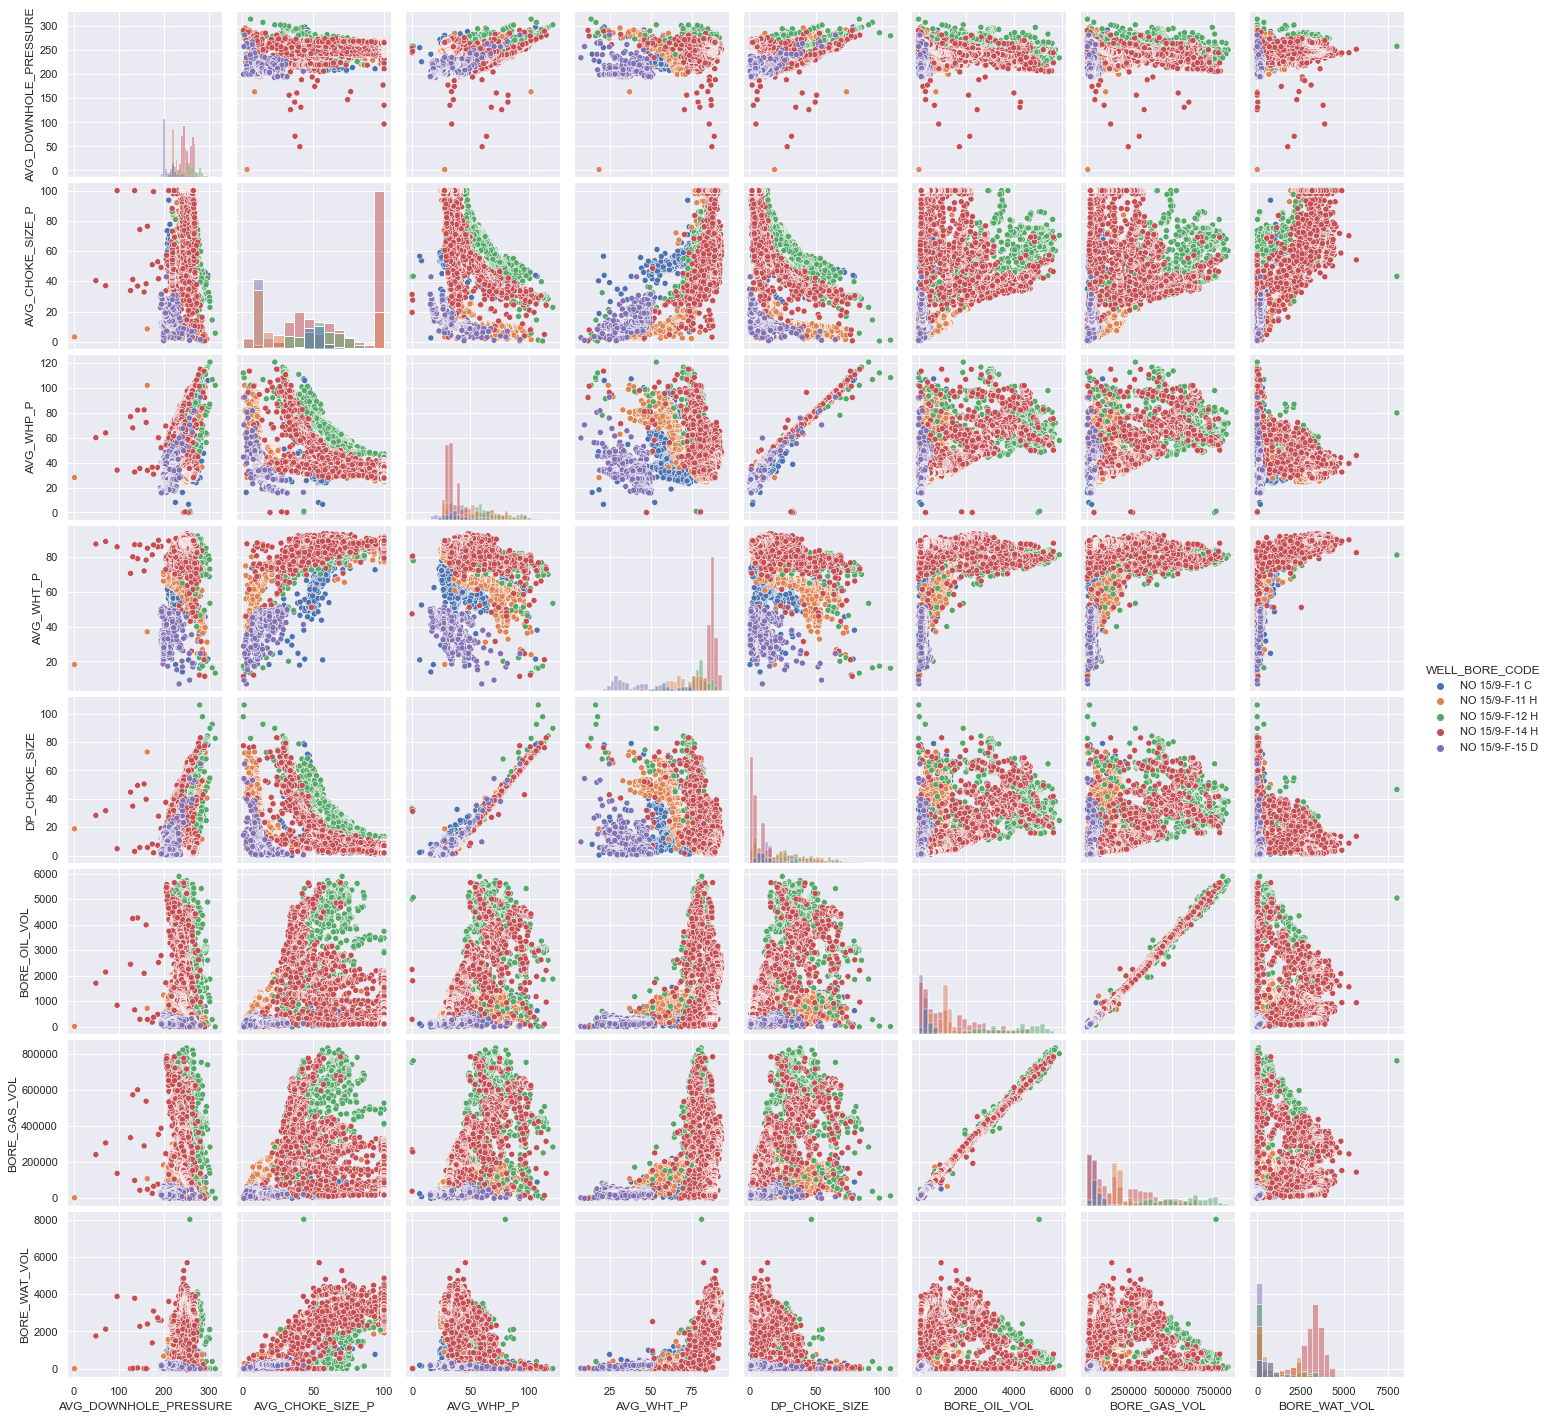

In [78]:
sns.pairplot(df, vars = ["AVG_DOWNHOLE_PRESSURE",
                                "AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE",
                                "BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"],diag_kind="hist", hue="WELL_BORE_CODE")

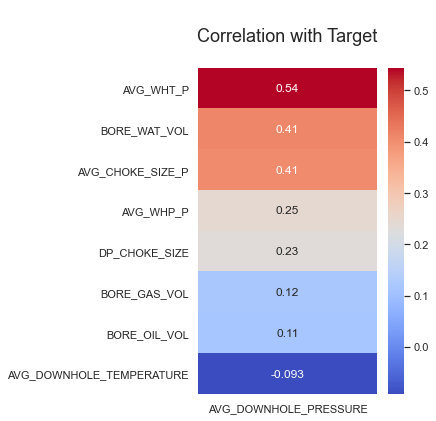

In [79]:
EDA_Func.corr_target(df, 'AVG_DOWNHOLE_PRESSURE','Correlation with Target', file=None)